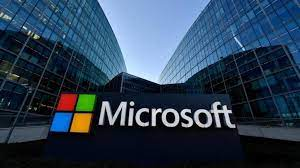

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Read Data


In [2]:
df=pd.read_csv('../input/microsoft-stock-data/MSFT.csv')

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061608,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063809,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064909,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063258,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062158,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060508,58435200
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.058858,59990400
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.057208,65289600
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.058308,32083200
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.059958,22752000


# Getting to Know The Data

In [4]:
df.shape

(8904, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8904 entries, 0 to 8903
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8904 non-null   object 
 1   Open       8904 non-null   float64
 2   High       8904 non-null   float64
 3   Low        8904 non-null   float64
 4   Close      8904 non-null   float64
 5   Adj Close  8904 non-null   float64
 6   Volume     8904 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 487.1+ KB


# Showing Basics Statistics
**Now that you’ve seen what data types are in your dataset, it’s time to get an overview of the values each column contains. You can do this with .describe():**


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8904.000000,8904.000000,8904.000000,8904.000000,8904.000000,8.904000e+03
mean,35.999118,36.385789,35.610874,36.011057,31.013661,5.934683e+07
std,46.783507,47.248428,46.319244,46.814441,46.948878,3.856663e+07
min,0.088542,0.092014,0.088542,0.090278,0.057208,2.304000e+06
25%,3.875000,3.921875,3.843750,3.875000,2.455539,3.536082e+07
50%,26.634999,26.930000,26.346875,26.620001,18.739412,5.257050e+07
75%,37.375000,37.660156,36.900002,37.401564,27.575310,7.320330e+07
max,279.399994,280.690002,277.149994,279.929993,279.929993,1.031789e+09


**.describe() won’t try to calculate a mean or a standard deviation for the object columns, since they mostly include text strings. However, it will still display some descriptive statistics**

In [7]:
df.describe(include=object)

,Date
count,8904
unique,8904
top,2015-10-08
freq,1


In [8]:
df["High"].value_counts()

27.500000     17
0.364583      15
26.000000     15
0.381944      15
0.369792      15
              ..
106.879997     1
6.046875       1
40.259998      1
0.146701       1
206.350006     1
Name: High, Length: 4990, dtype: int64

In [9]:
df["Low"].value_counts()

25.500000     18
27.000000     17
0.378472      17
2.656250      17
0.359375      16
              ..
55.439999      1
274.299988     1
33.130001      1
46.169998      1
182.869995     1
Name: Low, Length: 5004, dtype: int64

In [10]:
df["Close"].value_counts()

0.361111      16
27.250000     13
0.345486      12
2.460938      12
0.359375      12
              ..
41.869999      1
33.544998      1
0.642361       1
105.269997     1
243.029999     1
Name: Close, Length: 5196, dtype: int64

In [11]:
df["Volume"].value_counts()

18316800     4
84297600     3
58752000     3
51825600     3
48729600     3
            ..
53278100     1
28479900     1
42130400     1
155571600    1
49864700     1
Name: Volume, Length: 8722, dtype: int64

In [12]:
current_decade =df[df["Low"] > 0.091146]
current_decade

,Date,Open,High,Low,Close,Adj Close,Volume
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063809,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064909,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063258,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062158,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060508,58435200
...,...,...,...,...,...,...,...
8899,2021-07-02,272.820007,278.000000,272.500000,277.649994,277.649994,26458000
8900,2021-07-06,278.029999,279.369995,274.299988,277.660004,277.660004,31565600
8901,2021-07-07,279.399994,280.690002,277.149994,279.929993,279.929993,23260000
8902,2021-07-08,276.899994,278.730011,274.869995,277.420013,277.420013,24618600


In [13]:
current_decade =df[df["High"] > 0.098090]
current_decade

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061608,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063809,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064909,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063258,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062158,47894400
...,...,...,...,...,...,...,...
8899,2021-07-02,272.820007,278.000000,272.500000,277.649994,277.649994,26458000
8900,2021-07-06,278.029999,279.369995,274.299988,277.660004,277.660004,31565600
8901,2021-07-07,279.399994,280.690002,277.149994,279.929993,279.929993,23260000
8902,2021-07-08,276.899994,278.730011,274.869995,277.420013,277.420013,24618600


In [14]:
print('Max is:',df.max())
print('Sum is:',df.sum())
print('Mean is:',df.mean())

Max is: Date         2021-07-09
Open         279.399994
High         280.690002
Low          277.149994
Close        279.929993
Adj Close    279.929993
Volume       1031788800
dtype: object
Sum is: Date         1986-03-131986-03-141986-03-171986-03-181986-0...
Open                                             320536.144652
High                                              323979.06562
Low                                              317079.220406
Close                                            320642.455337
Adj Close                                        276145.641101
Volume                                            528424214700
dtype: object
Mean is: Open         3.599912e+01
High         3.638579e+01
Low          3.561087e+01
Close        3.601106e+01
Adj Close    3.101366e+01
Volume       5.934683e+07
dtype: float64


In [15]:
games_with_notes = df[df["Low"].notnull()]
games_with_notes.shape


(8904, 7)

<AxesSubplot:>

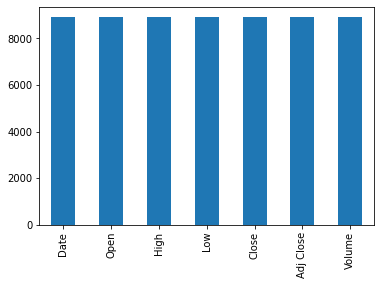

In [16]:
df.isnull().count().plot.bar()

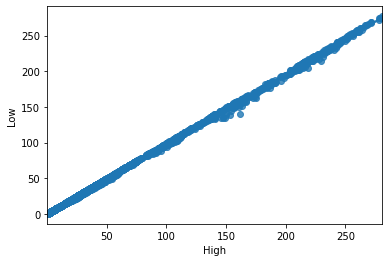

In [17]:
ax=sns.regplot(x='High',y='Low',data=df)


27.500000     17
0.364583      15
26.000000     15
0.381944      15
0.369792      15
              ..
106.879997     1
6.046875       1
40.259998      1
0.146701       1
206.350006     1
Name: High, Length: 4990, dtype: int64


<AxesSubplot:>

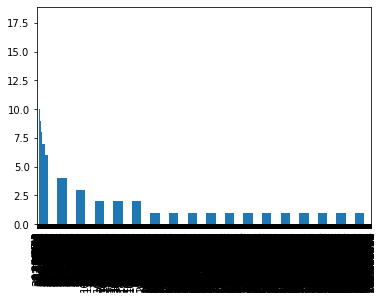

In [18]:
p = df['High'].value_counts()
print(p)
df['Low'].value_counts().plot.bar()

<AxesSubplot:xlabel='Volume', ylabel='count'>

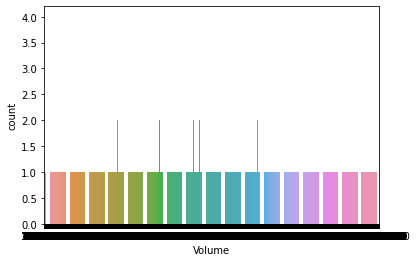

In [19]:
sns.countplot(data=df, x='Volume')

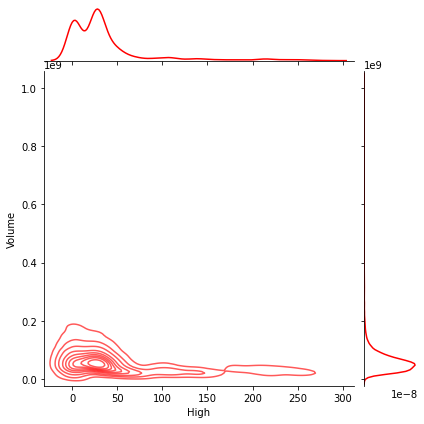

In [20]:
sns.jointplot(x = 'High', y = 'Volume',
              data = df, kind = 'kde', color = "red", alpha = 0.65)

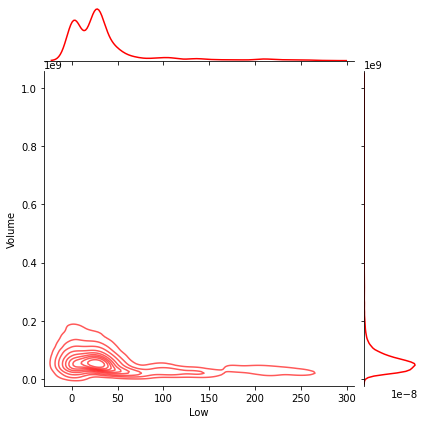

In [21]:
sns.jointplot(x = 'Low', y = 'Volume',
              data = df, kind = 'kde', color = "red", alpha = 0.65)

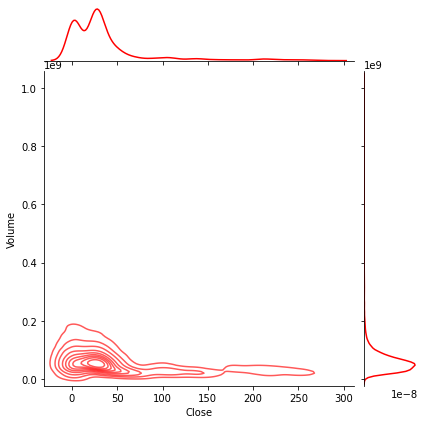

In [22]:
sns.jointplot(x = 'Close', y = 'Volume',
              data = df, kind = 'kde', color = "red", alpha = 0.65)

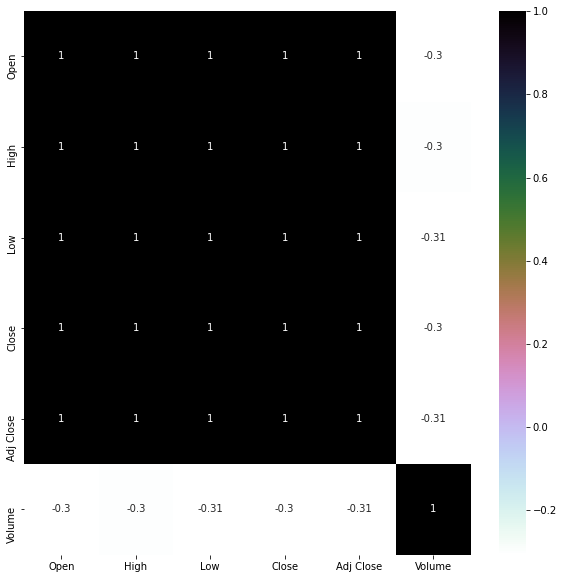

In [23]:
plt.figure(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

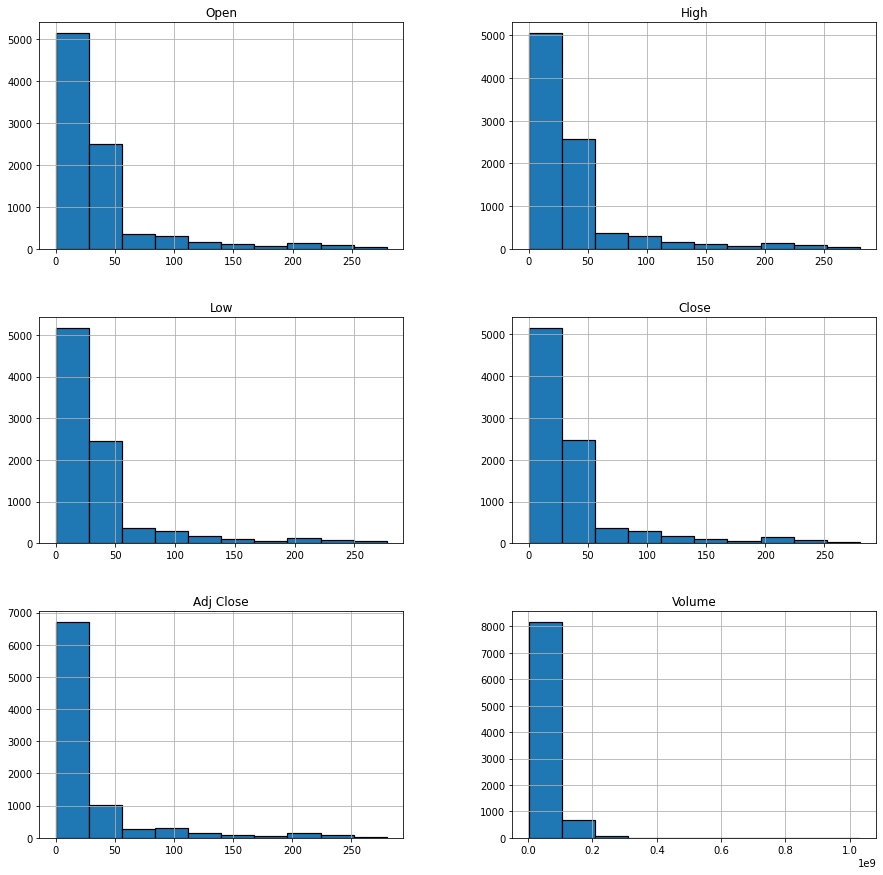

In [24]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

<AxesSubplot:xlabel='High', ylabel='Volume'>

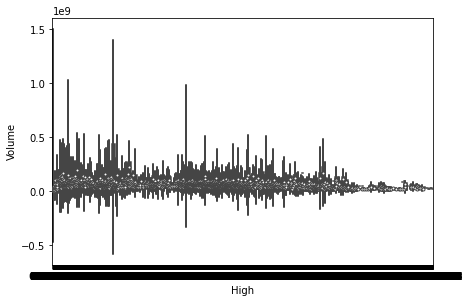

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='High',y='Volume',data=df)


In [26]:
X = df[['Open', 'High', 'Low','Close','Adj Close']]
y = df['Volume']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [29]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions1 = lr.predict(X_test)

In [30]:
print(classification_report(y_test,predictions1))
print('\n')
print(confusion_matrix(y_test,predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



[[15  0]
 [ 0 10]]


In [31]:
from sklearn.metrics import accuracy_score
acclr = accuracy_score(y_test,predictions1)*100
acclr

100.0